In [ ]:
#STEP1 可视化数据

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('df.csv')##读入数据，检查数据完整性
df

,Month,Sales
0,18-Jan,33848
1,18-Feb,32254
2,18-Mar,61393
3,18-Apr,71872
4,18-May,84000
5,18-Jun,73000
6,18-Jul,74000
7,18-Aug,90000
8,18-Sep,106660
9,18-Oct,120198


<AxesSubplot:>

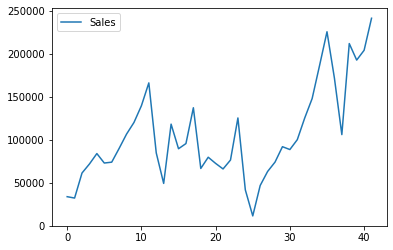

In [3]:
df.plot()  # 对销量画图

In [4]:
### 检验数据的平稳性

from statsmodels.tsa.stattools import adfuller

d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [5]:
test_result=adfuller(df['Sales'])

In [6]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [7]:
adfuller_test(df['Sales']) ##数据不平稳，需要做平稳性处理，差分

ADF Test Statistic : -0.5287148085870873
p-value : 0.8862901453991843
#Lags Used : 2
Number of Observations Used : 39
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [8]:
#做数据差分

In [9]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)  #一阶滞后差分

In [10]:
df['Sales'].shift(1) ##查看差分后的数据

0          NaN
1      33848.0
2      32254.0
3      61393.0
4      71872.0
5      84000.0
6      73000.0
7      74000.0
8      90000.0
9     106660.0
10    120198.0
11    139625.0
12    166203.0
13     84803.0
14     49285.0
15    118222.0
16     89621.0
17     95630.0
18    137291.0
19     66677.0
20     79740.0
21     72549.0
22     66118.0
23     76479.0
24    125420.0
25     41756.0
26     11481.0
27     46837.0
28     63154.0
29     74075.0
30     91998.0
31     88683.0
32    100173.0
33    125387.0
34    147993.0
35    186461.0
36    225699.0
37    171782.0
38    106060.0
39    211960.0
40    192736.0
41    204138.0
Name: Sales, dtype: float64

In [12]:
## Again test dickey fuller test   再次做dickey fuller test ，一阶差分后数据已经平稳，数据数据符合ARIMA model
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.980813457469273
p-value : 8.201395325430562e-10
#Lags Used : 1
Number of Observations Used : 39
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

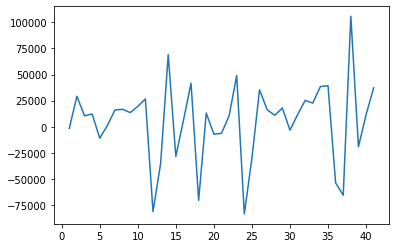

In [13]:
df['Seasonal First Difference'].plot()

In [14]:
#Auto Regressive Model  搭建ARIMA回归模型

d:\Users\JasonChow\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


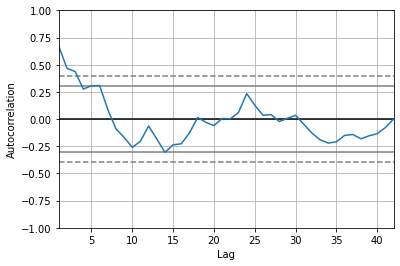

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

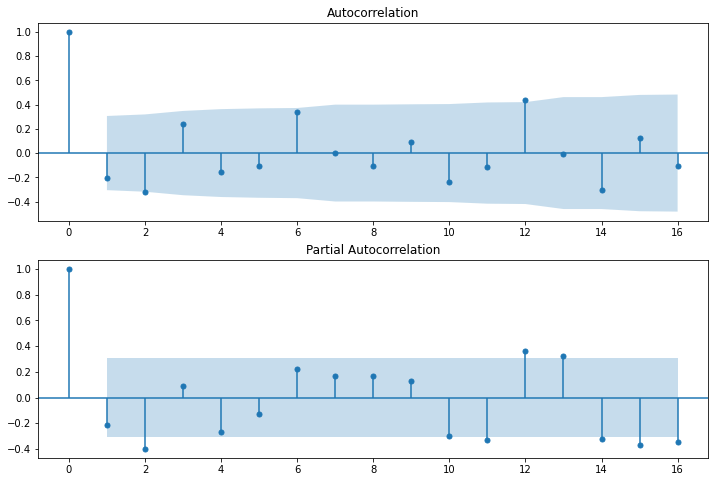

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[1:],lags=16,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[1:],lags=16,ax=ax2)

In [18]:
# For non-seasonal data  从ACF和PACF数据上可以得出，pdq的值
#p=1, d=1, q=1 or 0
from statsmodels.tsa.arima_model import ARIMA

In [19]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   41
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -487.832
Method:                       css-mle   S.D. of innovations          35475.295
Date:                Sat, 09 Oct 2021   AIC                            983.663
Time:                        08:21:25   BIC                            990.518
Sample:                             1   HQIC                           986.159
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4419.9181   2829.405      1.562      0.127   -1125.614    9965.451
ar.L1.D.Sales     0.2727      0.268      1.017      0.316      -0.253       0.799
ma.L1.D.Sales    -0.6460      0.202     -3.197      0.003      -1.042      -0.250
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.6664           +0.0000j            3.6664            0.0000
MA.1            1.5480           +0.0000j            1.5480            0.0000
-----------------------------------------------------------------------------
"""

In [21]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,1))
results=model.fit()

<AxesSubplot:>

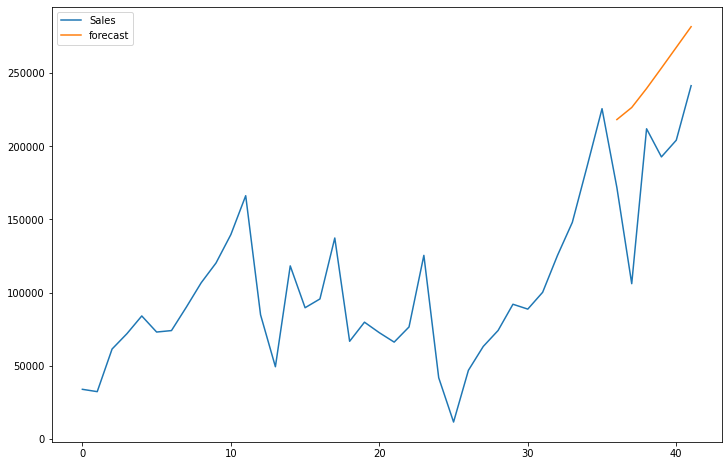

In [22]:
df['forecast']=results.predict(start=36,end=41,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._step)


<AxesSubplot:>

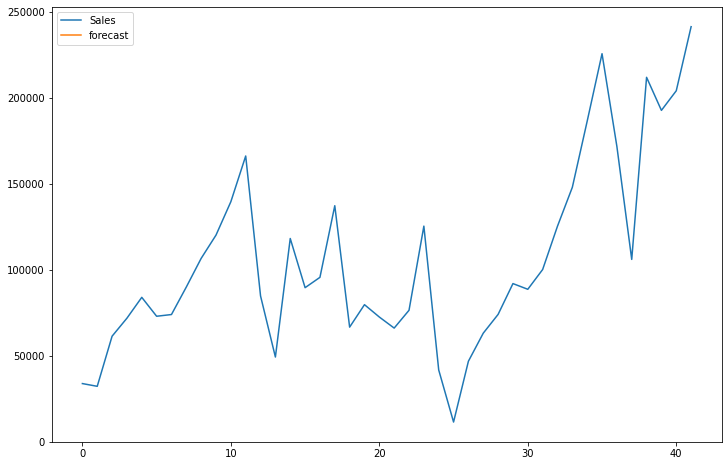

In [25]:
df['forecast']=results.predict(start=41,end=44,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
# Forecasting 预测数据

In [23]:
pred = results.predict(start = 41, end = 44, dynamic= True, typ='levels')
#预测，指定起始与终止时间。预测值起始时间必须在原始数据中，终止时间不需要
print(pred)

41    211898.603961
42    220138.114481
43    228559.108945
44    237018.617947
dtype: float64


d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._step)
